In [73]:
#-------------Election Vote Winning Strategy with Machine Learning Project in Python-----------------

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [3]:
#Loading Data to dataframe

from google.colab import drive
drive.mount('/content/drive')



data=pd.read_csv("/content/drive/My Drive/Colab Notebooks/election_vote/US_dataset.csv",encoding='ISO-8859-1')

Mounted at /content/drive


In [4]:
data.head()

,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party_detailed,candidatevotes,Result,Strategy 1,strategy 2,strategy 3,strategy 4,strategy 5,People_ survey (%)
0,2000,ALABAMA,AL,1,63,41,US PRESIDENT,"BUSH, GEORGE W.",REPUBLICAN,941173,win,free laptop,free bicycle,2gb data free for college studensts,free washing machine,6 lpg cylinders are free for a year,35%
1,2000,ALABAMA,AL,1,63,41,US PRESIDENT,"GORE, AL",DEMOCRAT,692611,loss,free hospitalization,govt job to ladies,loan waiver to hotels,education empowerment,free bicycle,28%
2,2000,ALABAMA,AL,1,63,41,US PRESIDENT,NaN,INDEPENDENT,25896,loss,incresing the investement from foreign MNC's,same ration card for all the states,free laptop,cancel of education loan,free bicycle,20%
3,2000,ALABAMA,AL,1,63,41,US PRESIDENT,"BROWNE, HARRY",LIBERTARIAN,5893,loss,clean US,repayment omission for gold loan,free washing machine,buliding concrete houses for people living in ...,free education,40%
4,2000,ALABAMA,AL,1,63,41,US PRESIDENT,NaN,NaN,699,loss,expanding the rural employtment guarantee sche...,hi-tech highways,transporation service in rural areas,free cylinders,2gb data free for students,39%


In [5]:
data.columns

Index(['year', 'state', 'state_po', 'state_fips', 'state_cen', 'state_ic',
       'office', 'candidate', 'party_detailed', 'candidatevotes', 'Result',
       'Strategy 1', 'strategy 2', 'strategy 3', 'strategy 4', 'strategy 5',
       'People_ survey (%)'],
      dtype='object')

In [6]:
data.tail()

,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party_detailed,candidatevotes,Result,Strategy 1,strategy 2,strategy 3,strategy 4,strategy 5,People_ survey (%)
997,2020,NEW YORK,NY,36,21,13,US PRESIDENT,"CHARLES, MARK",INDEPENDENT,98,loss,Clean US,Gas pipeline plan,2 GB data free for college student,Transportation services in rual areas,HI-Tech highways,18%
998,2020,NEW YORK,NY,36,21,13,US PRESIDENT,"HUNTER, DARIO",NaN,8,loss,Distribution of solar-powered cooking stoves,Free bicycle,Tourism development,free education,Govt job to ladies,19%
999,2020,NEW YORK,NY,36,21,13,US PRESIDENT,"MONTANYE, RICHARD CHARLES",NaN,1,loss,free laptop,free bicycle,2gb data free for college studensts,free washing machine,6 lpg cylinders are free for a year,35%
1000,2020,NEW YORK,NY,36,21,13,US PRESIDENT,BLANK VOTES,NaN,43541,loss,free hospitalization,govt job to ladies,loan waiver to hotels,education empowerment,free bicycle,28%
1001,2020,NEW YORK,NY,36,21,13,US PRESIDENT,VOID,NaN,23368,loss,incresing the investement from foreign MNC's,same ration card for all the states,free laptop,cancel of education loan,free bicycle,20%


In [7]:
data.describe()

,year,state_fips,state_cen,state_ic,candidatevotes
count,1002.00000,1002.000000,1002.000000,1002.000000,1.002000e+03
mean,2011.54491,15.390220,54.611776,38.543912,3.834337e+05
std,7.31430,10.055015,26.713038,24.129077,1.057973e+06
min,2000.00000,1.000000,14.000000,1.000000,0.000000e+00
25%,2004.00000,8.000000,33.000000,13.000000,7.725000e+02
50%,2012.00000,13.000000,53.000000,41.000000,7.273500e+03
75%,2020.00000,19.000000,84.000000,62.000000,1.279618e+05
max,2020.00000,36.000000,95.000000,82.000000,1.111025e+07


In [8]:
print(data.isnull().sum())

year                    0
state                   0
state_po                0
state_fips              0
state_cen               0
state_ic                0
office                  0
candidate              70
party_detailed        162
candidatevotes          0
Result                  0
Strategy 1              0
strategy 2              1
strategy 3              0
strategy 4              1
strategy 5              0
People_ survey (%)      0
dtype: int64


In [9]:
data.candidate = data.candidate.fillna("unknown")
print(data.isnull().sum())

year                    0
state                   0
state_po                0
state_fips              0
state_cen               0
state_ic                0
office                  0
candidate               0
party_detailed        162
candidatevotes          0
Result                  0
Strategy 1              0
strategy 2              1
strategy 3              0
strategy 4              1
strategy 5              0
People_ survey (%)      0
dtype: int64


In [10]:
data.party_detailed = data.party_detailed.fillna("unknown")
print(data.isnull().sum())

year                  0
state                 0
state_po              0
state_fips            0
state_cen             0
state_ic              0
office                0
candidate             0
party_detailed        0
candidatevotes        0
Result                0
Strategy 1            0
strategy 2            1
strategy 3            0
strategy 4            1
strategy 5            0
People_ survey (%)    0
dtype: int64


In [11]:
data["strategy 2"]= data["strategy 2"].fillna(data["strategy 2"].mode()[0])
print(data.isnull().sum())

year                  0
state                 0
state_po              0
state_fips            0
state_cen             0
state_ic              0
office                0
candidate             0
party_detailed        0
candidatevotes        0
Result                0
Strategy 1            0
strategy 2            0
strategy 3            0
strategy 4            1
strategy 5            0
People_ survey (%)    0
dtype: int64


In [12]:
data["strategy 3"]= data["strategy 3"].fillna(data["strategy 3"].mode()[0])
print(data.isnull().sum())

year                  0
state                 0
state_po              0
state_fips            0
state_cen             0
state_ic              0
office                0
candidate             0
party_detailed        0
candidatevotes        0
Result                0
Strategy 1            0
strategy 2            0
strategy 3            0
strategy 4            1
strategy 5            0
People_ survey (%)    0
dtype: int64


In [13]:
data["strategy 4"]= data["strategy 4"].fillna(data["strategy 4"].mode()[0])
print(data.isnull().sum())

year                  0
state                 0
state_po              0
state_fips            0
state_cen             0
state_ic              0
office                0
candidate             0
party_detailed        0
candidatevotes        0
Result                0
Strategy 1            0
strategy 2            0
strategy 3            0
strategy 4            0
strategy 5            0
People_ survey (%)    0
dtype: int64


In [14]:
data["strategy 5"]= data["strategy 5"].fillna(data["strategy 5"].mode()[0])
print(data.isnull().sum())

year                  0
state                 0
state_po              0
state_fips            0
state_cen             0
state_ic              0
office                0
candidate             0
party_detailed        0
candidatevotes        0
Result                0
Strategy 1            0
strategy 2            0
strategy 3            0
strategy 4            0
strategy 5            0
People_ survey (%)    0
dtype: int64


In [15]:
print(data.shape)
print("\n")
print(data.dtypes)

(1002, 17)


year                   int64
state                 object
state_po              object
state_fips             int64
state_cen              int64
state_ic               int64
office                object
candidate             object
party_detailed        object
candidatevotes         int64
Result                object
Strategy 1            object
strategy 2            object
strategy 3            object
strategy 4            object
strategy 5            object
People_ survey (%)    object
dtype: object


In [16]:
data.info()
print('_'*40)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   year                1002 non-null   int64 
 1   state               1002 non-null   object
 2   state_po            1002 non-null   object
 3   state_fips          1002 non-null   int64 
 4   state_cen           1002 non-null   int64 
 5   state_ic            1002 non-null   int64 
 6   office              1002 non-null   object
 7   candidate           1002 non-null   object
 8   party_detailed      1002 non-null   object
 9   candidatevotes      1002 non-null   int64 
 10  Result              1002 non-null   object
 11  Strategy 1          1002 non-null   object
 12  strategy 2          1002 non-null   object
 13  strategy 3          1002 non-null   object
 14  strategy 4          1002 non-null   object
 15  strategy 5          1002 non-null   object
 16  People_ survey (%)  1002

In [17]:
for column in data.columns.values.tolist():
    print(column)
    print (data[column].value_counts())
    print("")

year
2020    298
2000    151
2008    149
2016    148
2004    128
2012    128
Name: year, dtype: int64

state
NEW YORK                126
COLORADO                 97
FLORIDA                  66
IOWA                     60
DELAWARE                 50
ILLINOIS                 49
ARKANSAS                 46
CALIFORNIA               45
MICHIGAN                 44
IDAHO                    43
CONNECTICUT              42
MASSACHUSETTS            42
ALASKA                   41
ARIZONA                  40
HAWAII                   40
GEORGIA                  39
USNA                     39
DISTRICT OF COLUMBIA     37
KANSAS                   30
ALABAMA                  26
Name: state, dtype: int64

state_po
NY    126
CO     97
FL     66
IA     60
DE     50
IL     49
AR     46
CA     45
MI     44
ID     43
CT     42
MA     42
AK     41
AZ     40
HI     40
GA     39
IN     39
DC     37
KS     30
AL     26
Name: state_po, dtype: int64

state_fips
36    126
8      97
12     66
19     60
10     50
17  

In [18]:
#----Load the partyname with strategy and result
str1 = data[['party_detailed','Strategy 1', 'Result']]
str1

,party_detailed,Strategy 1,Result
0,REPUBLICAN,free laptop,win
1,DEMOCRAT,free hospitalization,loss
2,INDEPENDENT,incresing the investement from foreign MNC's,loss
3,LIBERTARIAN,clean US,loss
4,unknown,expanding the rural employtment guarantee sche...,loss
...,...,...,...
997,INDEPENDENT,Clean US,loss
998,unknown,Distribution of solar-powered cooking stoves,loss
999,unknown,free laptop,loss
1000,unknown,free hospitalization,loss


In [19]:
#----compare the Result with 'win'
result= str1[str1.Result =='win']
result

,party_detailed,Strategy 1,Result
0,REPUBLICAN,free laptop,win
5,REPUBLICAN,improving infrastructure in harbour ports,win
8,REFORM PARTY,job to youth 40%,win
13,REPUBLICAN,gas pipline plan,win
20,REPUBLICAN,gas pipline plan,win
...,...,...,...
902,REPUBLICAN,Free laptop,win
914,REPUBLICAN,Loan waiver to hotels,win
917,DEMOCRAT,Free bicycle,win
923,DEMOCRAT,Free laptop,win


In [20]:
#----Load the partyname with strategy and result
str2 = data[['party_detailed','strategy 2', 'Result']]
result2= str2[str2.Result =='win']
result2

,party_detailed,strategy 2,Result
0,REPUBLICAN,free bicycle,win
5,REPUBLICAN,same ration card for all the states,win
8,REFORM PARTY,tourism development,win
13,REPUBLICAN,hi-tech highways,win
20,REPUBLICAN,hi-tech highways,win
...,...,...,...
902,REPUBLICAN,Monthly RS 1500 for household women's,win
914,REPUBLICAN,Govt job to ladies,win
917,DEMOCRAT,distribution of solar-powered cooking stoves,win
923,DEMOCRAT,repayment omissio for gold loan,win


In [21]:
#----Load the partyname with strategy and result
str3 = data[['party_detailed','strategy 3', 'Result']]
result3= str3[str3.Result =='win']
result3

,party_detailed,strategy 3,Result
0,REPUBLICAN,2gb data free for college studensts,win
5,REPUBLICAN,increasing the public toilets,win
8,REFORM PARTY,cancel of education loan,win
13,REPUBLICAN,transporation service in rural areas,win
20,REPUBLICAN,transporation service in rural areas,win
...,...,...,...
902,REPUBLICAN,Hi-Tech highways,win
914,REPUBLICAN,Free hospitalization,win
917,DEMOCRAT,Hi-Tech highways,win
923,DEMOCRAT,women would get a 50 percent fare cut in town ...,win


In [22]:
#----Load the partyname with strategy and result
str4 = data[['party_detailed','strategy 4', 'Result']]
result4= str4[str4.Result =='win']
result4

,party_detailed,strategy 4,Result
0,REPUBLICAN,free washing machine,win
5,REPUBLICAN,reservation in private sector wil also insisted,win
8,REFORM PARTY,hi-tech highways,win
13,REPUBLICAN,improvinf infrascture in harbour ports,win
20,REPUBLICAN,improvinf infrascture in harbour ports,win
...,...,...,...
902,REPUBLICAN,Free hospitalization,win
914,REPUBLICAN,Job to youth 40%,win
917,DEMOCRAT,Free hospitalization,win
923,DEMOCRAT,building concrete house for people living in huts,win


In [23]:
#----Load the partyname with strategy and result
str5 = data[['party_detailed','strategy 5', 'Result']]
result5= str5[str5.Result =='win']
result5

,party_detailed,strategy 5,Result
0,REPUBLICAN,6 lpg cylinders are free for a year,win
5,REPUBLICAN,clean US,win
8,REFORM PARTY,gas pipeline plan,win
13,REPUBLICAN,increasing the investements from fereign MNC's,win
20,REPUBLICAN,increasing the investements from fereign MNC's,win
...,...,...,...
902,REPUBLICAN,Distribution of solar-powered cooking stoves,win
914,REPUBLICAN,Monthly RS 1500 for household women's,win
917,DEMOCRAT,Free laptop,win
923,DEMOCRAT,distribution of solar-powered cooking stoves,win


In [24]:
#----Load all the partyname with strategy and result
results = data[['party_detailed','Strategy 1','strategy 2','strategy 3','strategy 4','strategy 5','Result']]
print(results)

     party_detailed                                         Strategy 1  \
0        REPUBLICAN                                        free laptop   
1          DEMOCRAT                               free hospitalization   
2       INDEPENDENT       incresing the investement from foreign MNC's   
3       LIBERTARIAN                                           clean US   
4           unknown  expanding the rural employtment guarantee sche...   
...             ...                                                ...   
997     INDEPENDENT                                           Clean US   
998         unknown       Distribution of solar-powered cooking stoves   
999         unknown                                        free laptop   
1000        unknown                               free hospitalization   
1001        unknown       incresing the investement from foreign MNC's   

                               strategy 2  \
0                            free bicycle   
1                    

In [83]:
# Check if any numerical columns are discrete
discrete_columns = [feature for feature in data.columns if len(data[feature].unique()) < 20 and feature not in ['Result'] ]
print(f'Number of discrete Columns is {len(discrete_columns)}')
for i in discrete_columns:
    print(f'{i} has {len(data[i].unique())} discrete values')

data[discrete_columns].head()

Number of discrete Columns is 2
year has 6 discrete values
office has 1 discrete values


,year,office
0,2000,US PRESIDENT
1,2000,US PRESIDENT
2,2000,US PRESIDENT
3,2000,US PRESIDENT
4,2000,US PRESIDENT


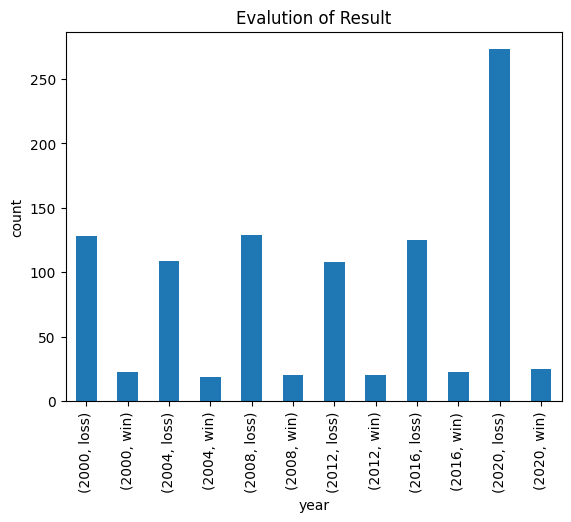

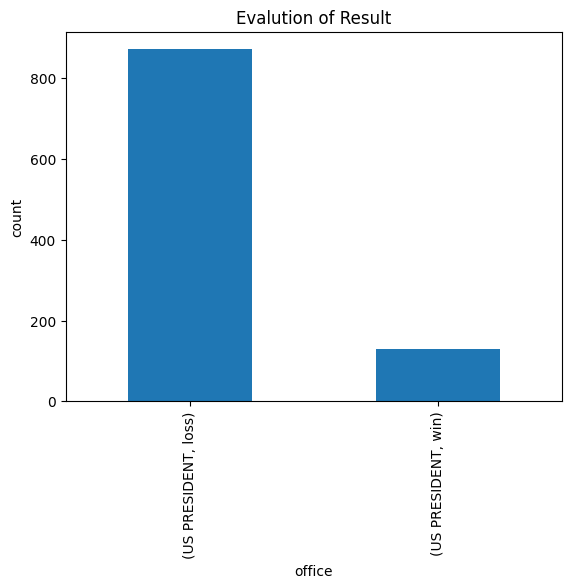

In [84]:
#Check distribution of the discrete data Results
for feature in discrete_columns:
    dt=data.copy()
    dt.groupby(feature)['Result'].value_counts().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('count')
    plt.title('Evalution of Result')
    plt.show()

In [25]:
#----ML ALgorithm Starts----------Split the Train and Test Data
#-----------1) Algorithm: Apply Logistic Regression model
train,test=train_test_split(data,test_size=0.3)
print(train.shape)
print(test.shape)

(701, 17)
(301, 17)


In [26]:
#-----------Apply predicate variables
prediction_var=['candidatevotes']

In [27]:
train_X=train[prediction_var]
train_Y=train['party_detailed']

In [28]:
train_X=train[prediction_var]
train_Y1=train['Strategy 1']

In [29]:
train_X=train[prediction_var]
train_Z=train['strategy 2']

In [30]:
test_X=test[prediction_var]
test_Y=test['party_detailed']

In [31]:
test_X=train[prediction_var]
test_Y1=train['Strategy 1']

In [32]:
test_X=train[prediction_var]
test_Z=train['strategy 2']

In [33]:
#-----------Apply Logistic Regression model
logistic_model=LogisticRegression()
logistic_model.fit(train_X,train_Y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [34]:
logistic_model_1=LogisticRegression()
logistic_model_1.fit(train_X,train_Z)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [35]:
logistic_model_2=LogisticRegression()
logistic_model_2.fit(train_X,train_Y1)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [36]:
predicted_value=logistic_model.predict(test_X)

In [37]:
predicted_value_1=logistic_model_1.predict(test_X)

In [38]:
predicted_value_2=logistic_model_2.predict(test_X)

In [39]:
pd.DataFrame({'winning strategy':test_Y1})

,winning strategy
773,free laptop
145,Repayment omission for gold loans
363,government jobs to families without anyone in ...
550,clean US
48,loan waiber to hotels
...,...
505,reserve 6% of the annual budget for education
575,education empowerment
662,Free hospitalization
201,Govt job to ladies


In [41]:
pd.DataFrame({'partyname':predicted_value,'strategy`s':test_Z})

,partyname,strategy`s
773,DEMOCRAT,free bicycle
145,DEMOCRAT,Decrease of tax
363,DEMOCRAT,increase in maternity leave period and assistance
550,DEMOCRAT,repayment omission for gold loan
48,DEMOCRAT,decrease of petrol
...,...,...
505,DEMOCRAT,financial support for families on death of gov...
575,DEMOCRAT,eradication of racisim
662,DEMOCRAT,building concrete houses for people living in ...
201,DEMOCRAT,Free laptop


In [42]:
from  sklearn.preprocessing import LabelEncoder

In [43]:
#----convert the string value count in the strategy into numeric values  with LabelEncoder
le_Strategy_1 = LabelEncoder()
le_strategy_2 = LabelEncoder()
le_strategy_3 = LabelEncoder()
le_strategy_4 = LabelEncoder()
le_strategy_5 = LabelEncoder()

In [44]:
data['Strategy_1n']= le_Strategy_1.fit_transform(data['Strategy 1'])
data['strategy_2n']= le_strategy_2.fit_transform(data['strategy 2'])
data['strategy_3n']= le_strategy_3.fit_transform(data['strategy 3'])
data['strategy_4n']= le_strategy_4.fit_transform(data['strategy 4'])
data['strategy_5n']= le_strategy_5.fit_transform(data['strategy 5'])
data.head()


,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party_detailed,candidatevotes,...,strategy 2,strategy 3,strategy 4,strategy 5,People_ survey (%),Strategy_1n,strategy_2n,strategy_3n,strategy_4n,strategy_5n
0,2000,ALABAMA,AL,1,63,41,US PRESIDENT,"BUSH, GEORGE W.",REPUBLICAN,941173,...,free bicycle,2gb data free for college studensts,free washing machine,6 lpg cylinders are free for a year,35%,103,99,5,96,9
1,2000,ALABAMA,AL,1,63,41,US PRESIDENT,"GORE, AL",DEMOCRAT,692611,...,govt job to ladies,loan waiver to hotels,education empowerment,free bicycle,28%,102,117,147,74,100
2,2000,ALABAMA,AL,1,63,41,US PRESIDENT,unknown,INDEPENDENT,25896,...,same ration card for all the states,free laptop,cancel of education loan,free bicycle,20%,131,155,111,66,100
3,2000,ALABAMA,AL,1,63,41,US PRESIDENT,"BROWNE, HARRY",LIBERTARIAN,5893,...,repayment omission for gold loan,free washing machine,buliding concrete houses for people living in ...,free education,40%,74,152,118,64,103
4,2000,ALABAMA,AL,1,63,41,US PRESIDENT,unknown,unknown,699,...,hi-tech highways,transporation service in rural areas,free cylinders,2gb data free for students,39%,88,123,167,84,5


In [45]:
#-----------ML Algorithm----------------------------
#-----------2,3) Algorithm: Apply Linear Regression model, Polynomail
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [46]:
Winning_Strategy1= data[['party_detailed','Strategy_1n','strategy_2n','strategy_3n','strategy_4n','strategy_5n', 'Result']]
result1=Winning_Strategy1[Winning_Strategy1.Result=='win']

In [47]:
result1

,party_detailed,Strategy_1n,strategy_2n,strategy_3n,strategy_4n,strategy_5n,Result
0,REPUBLICAN,103,99,5,96,9,win
5,REPUBLICAN,121,155,140,140,79,win
8,REFORM PARTY,136,160,76,107,117,win
13,REPUBLICAN,112,123,167,108,133,win
20,REPUBLICAN,112,123,167,108,133,win
...,...,...,...,...,...,...,...
902,REPUBLICAN,29,57,36,27,18,win
914,REPUBLICAN,50,36,28,44,56,win
917,DEMOCRAT,26,86,36,27,31,win
923,DEMOCRAT,29,150,171,62,89,win


In [49]:
loss_strategy= data[['party_detailed','Strategy_1n','strategy_2n','strategy_3n','strategy_4n','strategy_5n', 'Result']]
loss_result=loss_strategy[loss_strategy.Result=='loss']
loss_result

,party_detailed,Strategy_1n,strategy_2n,strategy_3n,strategy_4n,strategy_5n,Result
1,DEMOCRAT,102,117,147,74,100,loss
2,INDEPENDENT,131,155,111,66,100,loss
3,LIBERTARIAN,74,152,118,64,103,loss
4,unknown,88,123,167,84,5,loss
6,DEMOCRAT,95,105,5,10,117,loss
...,...,...,...,...,...,...,...
997,INDEPENDENT,12,35,1,55,37,loss
998,unknown,17,29,62,85,36,loss
999,unknown,103,99,5,96,9,loss
1000,unknown,102,117,147,74,100,loss


In [50]:
x=result1['Strategy_1n'].values
y=result1['strategy_2n'].values

In [51]:
x=x.reshape(-1,1)

In [52]:
poly = PolynomialFeatures(degree=16)

In [53]:
x_poly = poly.fit_transform(x)

In [54]:
poly.fit(x_poly,y)

PolynomialFeatures(degree=16)

In [55]:
linreg = LinearRegression()

In [56]:
linreg.fit(x_poly,y)

LinearRegression()

In [57]:
y_pred= linreg.predict(x_poly)

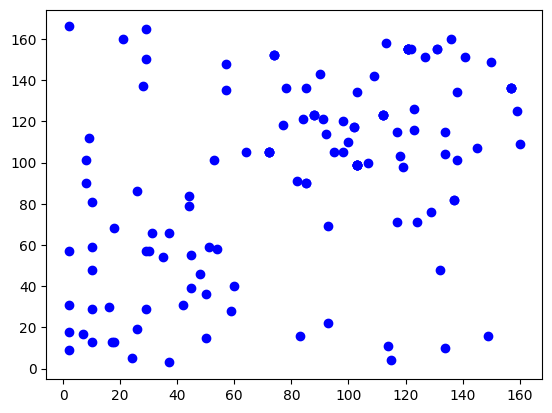

In [59]:
plt.scatter(x,y,color='blue')


In [60]:
import numpy as np
y1_pred=np.zeros(10000)
y1_test=np.zeros(10000)
electors=np.random.randint(0,1000,300)
totvopoll=np.random.randint(0,1000,400)
y1_pred[electors]=1
y1_test[electors]=2
y1_pred[totvopoll]=1
y1_test[totvopoll]=2

In [61]:
np.sum(y1_test)

1012.0

In [62]:
np.sum(y1_pred)

506.0

In [63]:
from sklearn.metrics import accuracy_score
print('Accuracy score1=' , accuracy_score(y1_test,y1_pred))

Accuracy score1= 0.9494


In [64]:
import numpy as np
y2_pred=np.zeros(10000)
y2_test=np.zeros(10000)
electors=np.random.randint(0,1000,300)
totvopoll=np.random.randint(0,1000,400)
y2_pred[electors]=1
y2_test[electors]=3
y2_pred[totvopoll]=1
y2_test[totvopoll]=3

In [65]:
np.sum(y2_test)

1539.0

In [66]:
np.sum(y2_pred)

513.0

In [67]:
from sklearn.metrics import accuracy_score
print('Accuracy score2=' , accuracy_score(y2_test,y2_pred))

Accuracy score2= 0.9487


In [68]:
prediction_var=['st_name','year','pc_no','pc_name','pc_type','cand_name','cand_sex','partyname','partyabbre','totvotpoll','electors','Result','Strategy 1','strategy 2','strategy 3','strategy 4','strategy 5','People_ survey (%)']

In [69]:
prediction_var

['st_name',
 'year',
 'pc_no',
 'pc_name',
 'pc_type',
 'cand_name',
 'cand_sex',
 'partyname',
 'partyabbre',
 'totvotpoll',
 'electors',
 'Result',
 'Strategy 1',
 'strategy 2',
 'strategy 3',
 'strategy 4',
 'strategy 5',
 'People_ survey (%)']

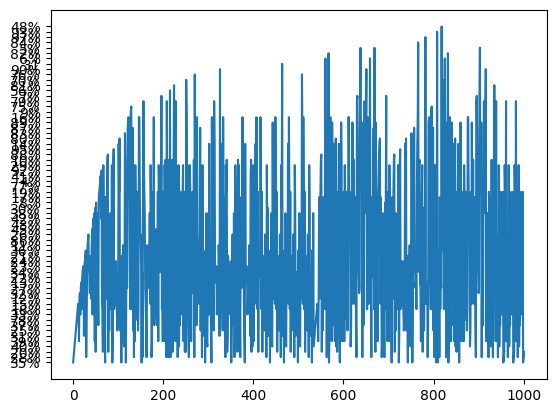

In [70]:
plt.plot(data['People_ survey (%)'])
plt.show()

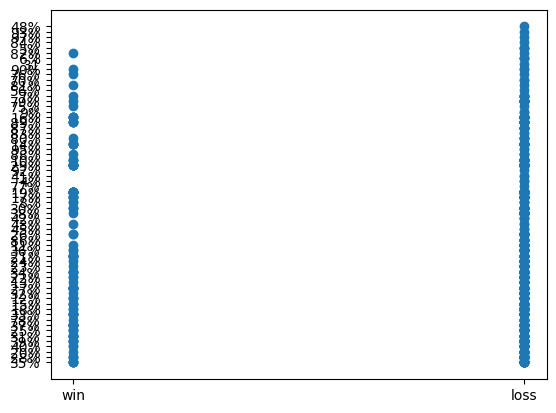

In [72]:
plt.scatter(data['Result'],data['People_ survey (%)'])
plt.show()

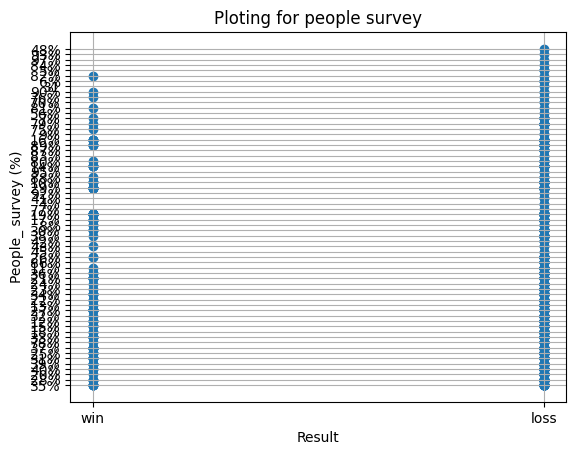

In [73]:
plt.scatter(data['Result'],data['People_ survey (%)'])
plt.xlabel("Result")
plt.ylabel("People_ survey (%)")
plt.title("Ploting for people survey")
plt.grid()

In [76]:
prediction_var=['year','Result','partyname','totvotpoll','st_name']

In [77]:
prediction_var

['year', 'Result', 'partyname', 'totvotpoll', 'st_name']

In [78]:
str1 = data[['year','state','candidatevotes','Result']]
str1

,year,state,candidatevotes,Result
0,2000,ALABAMA,941173,win
1,2000,ALABAMA,692611,loss
2,2000,ALABAMA,25896,loss
3,2000,ALABAMA,5893,loss
4,2000,ALABAMA,699,loss
...,...,...,...,...
997,2020,NEW YORK,98,loss
998,2020,NEW YORK,8,loss
999,2020,NEW YORK,1,loss
1000,2020,NEW YORK,43541,loss


In [79]:
import seaborn as sns

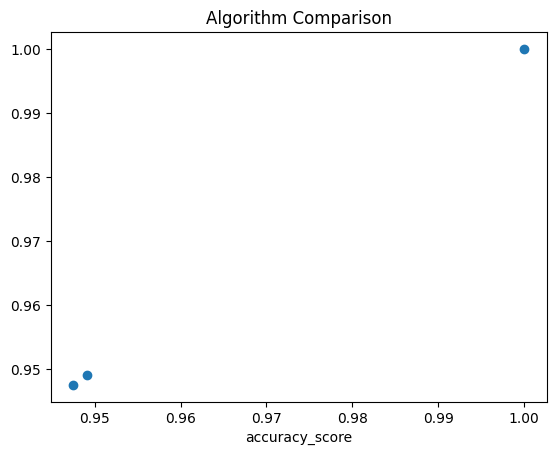

In [81]:
# Alogirthm Comparisio of -----------ML Algorithms----------------------------
#-----------1,2,3) Algorithms: Logistic Regression, Linear Regression model, Polynomail
import matplotlib.pyplot as plt
x=1.0,0.9491,0.9475
y=1.0,0.9491,0.9475
plt.scatter(x,y)
plt.xlabel("accuracy_score")
plt.title("Algorithm Comparison")
plt.show()